## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import index
res = np.load('average_ratings.npy')
res = np.transpose(res)
res = pd.DataFrame(res)
res

,0,1,2
0,5.000000,7.000000,3.000000
1,5.013103,6.970750,2.996861
2,5.026240,7.000000,2.993725
3,5.013103,6.970750,2.996861
4,5.000000,6.941621,3.000000
...,...,...,...
1090,5.493987,10.000000,2.987464
1091,5.508384,10.000000,2.990593
1092,5.522819,10.000000,2.993725
1093,5.537292,10.000000,2.990593


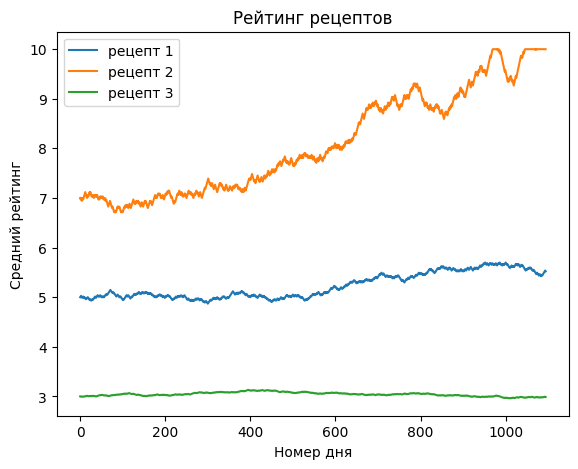

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
y1_line = ax.plot(res.index,res.iloc[:,0],label = "рецепт 1")
y2_line = ax.plot(res.index,res.iloc[:,1],label = "рецепт 2")
y3_line = ax.plot(res.index,res.iloc[:,2],label = "рецепт 3")
ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Рейтинг рецептов")
ax.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


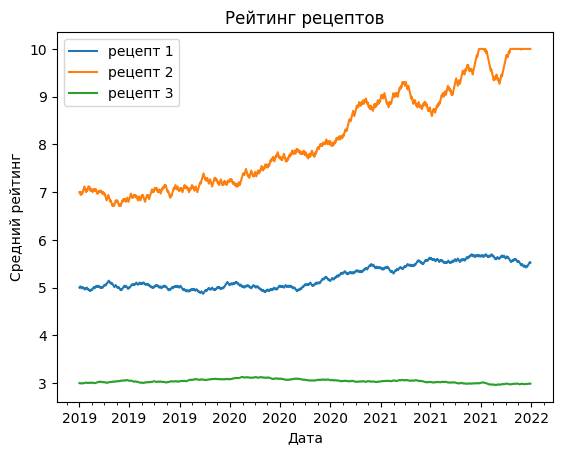

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import WeekdayLocator, DateFormatter, MonthLocator
res_loaded = np.load('average_ratings.npy')
x = pd.date_range(start = '1/1/2019',end = '30/12/2021')
fig, ax = plt.subplots()
y1_line = ax.plot(x,res_loaded[0],label = "рецепт 1")
y2_line = ax.plot(x,res_loaded[1],label = "рецепт 2")
y3_line = ax.plot(x,res_loaded[2],label = "рецепт 3")

ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.xaxis.set_minor_locator(MonthLocator())
ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Рейтинг рецептов")
ax.legend()
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

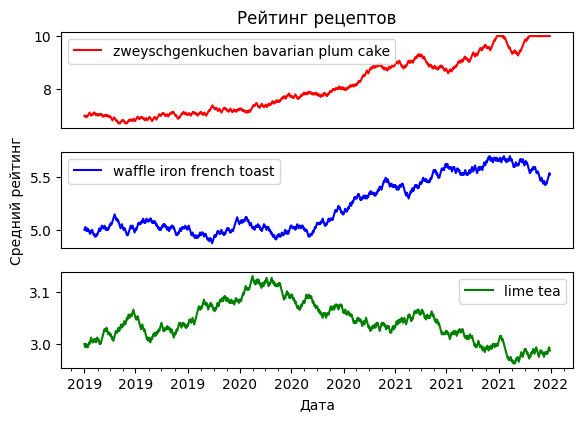

In [ ]:
fig = plt.figure()
a1 = fig.add_axes([0.1,0.35,0.8,0.2])
a2 = fig.add_axes([0.1,0.6,0.8,0.2])
a3 = fig.add_axes([0.1,0.1,0.8,0.2])
y1_line = a1.plot(res.iloc[:,0],'b',label = "waffle iron french toast")
y2_line = a2.plot(res.iloc[:,1],'r',label = "zweyschgenkuchen bavarian plum cake")
y3_line = a3.plot(x,res.iloc[:,2],'g',label = "lime tea")
a3.xaxis.set_major_formatter(DateFormatter('%Y'))
a3.xaxis.set_minor_locator(MonthLocator())
a1.get_xaxis().set_visible(False)
a2.get_xaxis().set_visible(False)
a3.set_xlabel("Дата")
a1.set_ylabel("Средний рейтинг")
a2.set_title("Рейтинг рецептов")
a1.legend()
a2.legend()
a3.legend()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


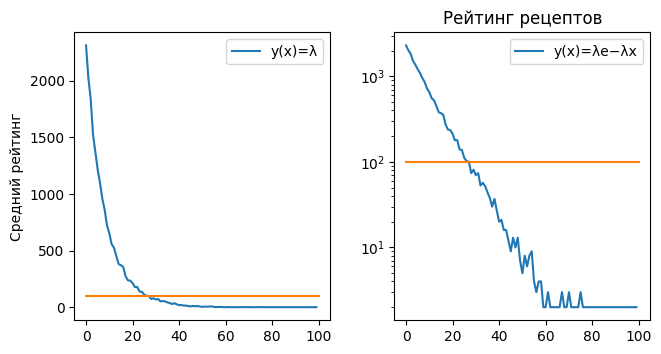

In [ ]:
rev = np.load('visitors.npy')
rev
fig = plt.figure()
x = [0,100]
y = [100,100]
a1 = fig.add_axes([0.05,0.1,0.4,0.6])
a2 = fig.add_axes([0.55,0.1,0.4,0.6])
a2.set_yscale('log')
gr1 = a1.plot(rev,label = 'y(x)=λ')
gr2 = a1.plot(x,y)
gr3 = a2.plot(rev,label = 'y(x)=λe−λx')
gr2 = a2.plot(x,y)
a3.set_xlabel("Дата")
a1.set_ylabel("Средний рейтинг")
a2.set_title("Рейтинг рецептов")
a1.legend()
a2.legend()
a3.legend()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
recipes = pd.read_csv('recipes_sample.csv')
recipes

FileNotFoundError: ignored

In [ ]:
part1 = recipes[recipes['minutes']<5]
part2 = recipes[(recipes['minutes']>=5) & (recipes['minutes']<50)]
part3 = recipes[recipes['minutes']>=50]
tabli = plt.figure()
ax1 = tabli.add_axes([0.1,0.1,0.5,0.8])
ax2 = tabli.add_axes([0.7,0.1,0.5,0.9])
step1 = pd.DataFrame([part1['n_steps'].mean(),part2['n_steps'].mean(),part3['n_steps'].mean()])

step2 = pd.DataFrame([part1['n_steps'].sum(),part2['n_steps'].sum(),part3['n_steps'].sum()])
labels = ['короткие','средние','длинные']
fig, ax = plt.subplots() 
x = [1,4,5]
ax1.pie(step2[0], labels = labels) 
stolb = plt.bar(['короткие','средние','длинные'],step1[0])
ax1.set_xlabel('Группы рецептов')
ax1.set_ylabel('Среднее количество шагов')

NameError: ignored

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


Text(0.5, 0.98, 'Рейтинги отзывов')

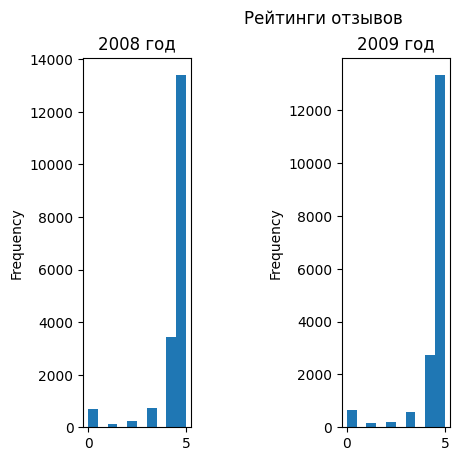

In [ ]:
reviews = pd.read_csv('reviews_sample.csv')
reviews['date'] = pd.to_datetime(reviews['date'])
date1 = reviews[(reviews['date']>= '01-01-2008') & (reviews['date']<= '31-12-2008')]
date2 = reviews[(reviews['date']>= '01-01-2009') & (reviews['date']<= '31-12-2009')]
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,3)
date1['rating'].plot.hist(ax=ax1)
date2['rating'].plot.hist(ax=ax2)
ax1.set_title('2008 год')
ax2.set_title('2009 год')
fig.suptitle('Рейтинги отзывов')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.09, 0.02, 'Зависимость есть')

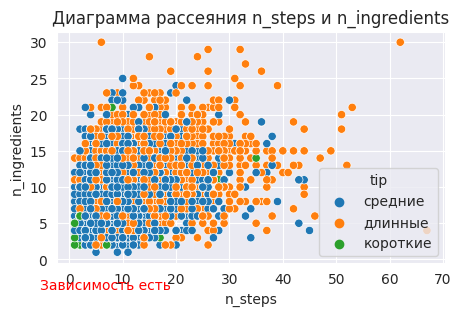

In [ ]:
import seaborn as sns

def tipis(row):
  if row['minutes']<5:
    return 'короткие'
  if row['minutes']<50:
    return 'средние'
  if row['minutes']>50:
    return 'длинные'
recipes = pd.read_csv('recipes_sample.csv')
recipes = recipes.dropna(subset=['n_steps'])
recipes['tip'] = recipes.apply(tipis,axis = 1)

fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,3))
sns.scatterplot(data = recipes, x = 'n_steps',y = 'n_ingredients',hue = 'tip')
ax.set_title("Диаграмма рассеяния n_steps и n_ingredients")
fig.text(0.09,0.02,"Зависимость есть", color = 'r')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

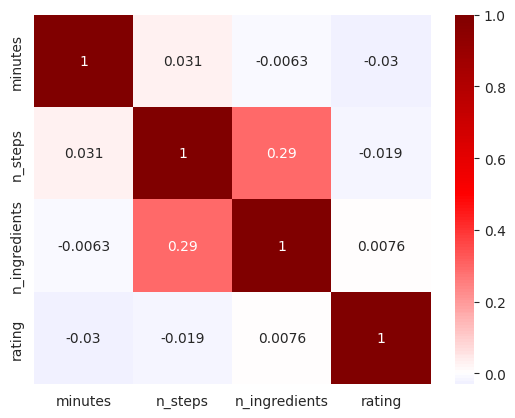

In [ ]:
reviews = pd.read_csv('reviews_sample.csv')
obch = pd.merge(recipes,reviews,left_on = 'id',right_on='recipe_id')[['minutes','n_steps','n_ingredients','rating']]
dati = sns.heatmap(obch.corr(),cmap= 'seismic',center = 0.0,annot = True)
